In [1]:
# The paths of the signal and the data set.
AUDIO_FILE = "/home/yaron/Office/Home_Excercise/Tirza/data/mono_1.wav"
DATA_SET = "/home/yaron/Office/Home_Excercise/Tirza/data/SBC001_labels.csv"
print(DATA_SET)

/home/yaron/Office/Home_Excercise/Tirza/data/SBC001_labels.csv


In [2]:
import torch
import torchaudio
import torchaudio.transforms as T
import torchaudio.functional as F
import numpy as np
import pandas as pd
from IPython.display import Audio
import matplotlib.pyplot as plt

In [3]:
n_fft = 2048
win_length = None
hop_length = 512

# Define transform
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)

def plot_waveform(waveform, sr, title="Waveform"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)

torch.Size([1, 33427566])
22050


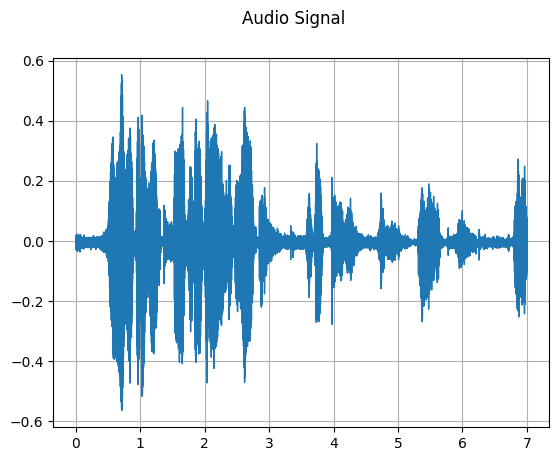

In [4]:
audio_signal, fs = torchaudio.load(AUDIO_FILE)
print(audio_signal.size())
print(fs)
start_ind = int(16*fs)
end_ind = int(23*fs)
active_signal = torch.unsqueeze(audio_signal[0,start_ind:end_ind], 0)
plot_waveform(active_signal, fs, title="Audio Signal")
Audio(active_signal.numpy(), rate=fs)

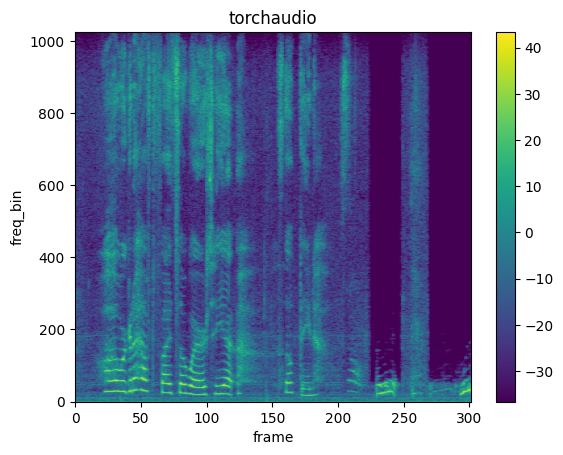

torch.Size([1, 1025, 302])

In [5]:
import librosa

def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)
    
spec = spectrogram(active_signal)
plot_spectrogram(spec[0], title="torchaudio")
spec.shape